# 플로이드 워셜 알고리즘
---

다익스트라 알고리즘은 한 지점에서 특정 지점까지의 최단 경로를 구하는 상황에서 쓰는 알고리즘이라면 

**플로이드 워셜 알고리즘**은 **'모든 지점에서 다른 모든 지점까지의 최단 경로를 모두 구해야하는 경우'** 사용할 수 있는 알고리즘이다.



- 각 단계마다 특정한 노드 k를 거쳐 가는 경우를 확인한다.
    - a에서 b로 가는 최단 거리보다 a에서 k를 거쳐 b로 가는 거리가 더 짧은지 검사한다.
    
    
- 점화식
        Dab = min(Dab, Dak + Dkb)

## 동작 과정 살펴복

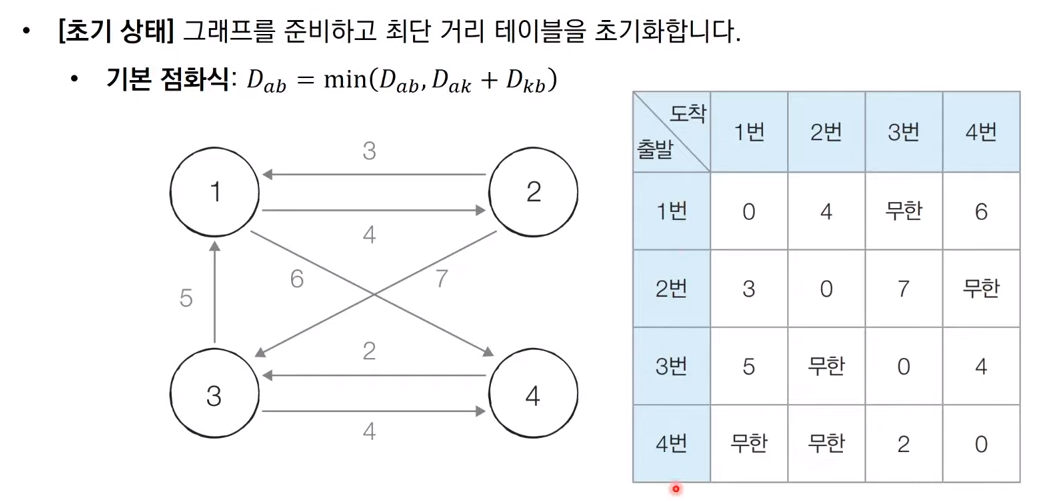

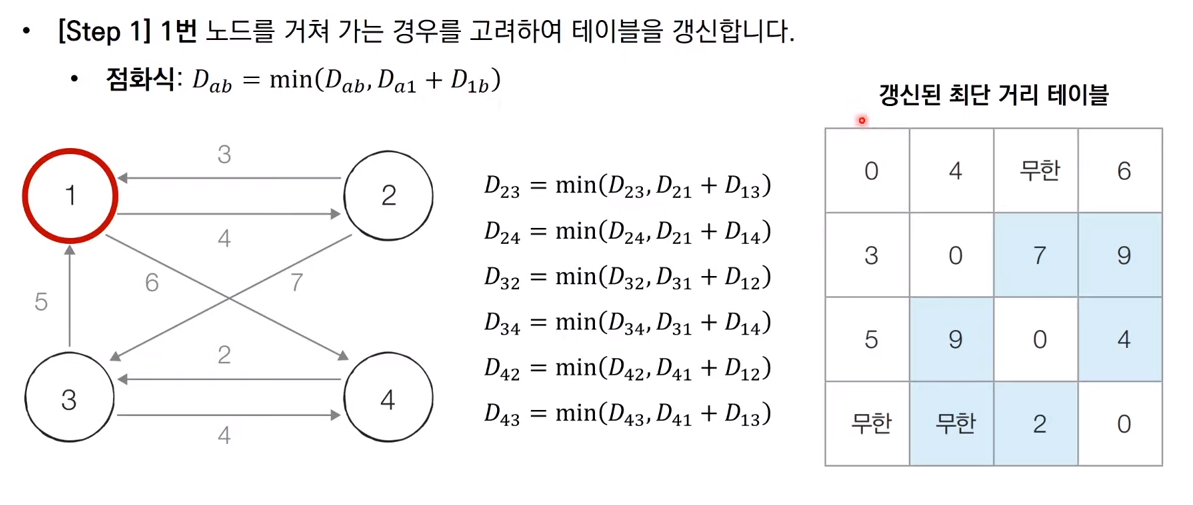

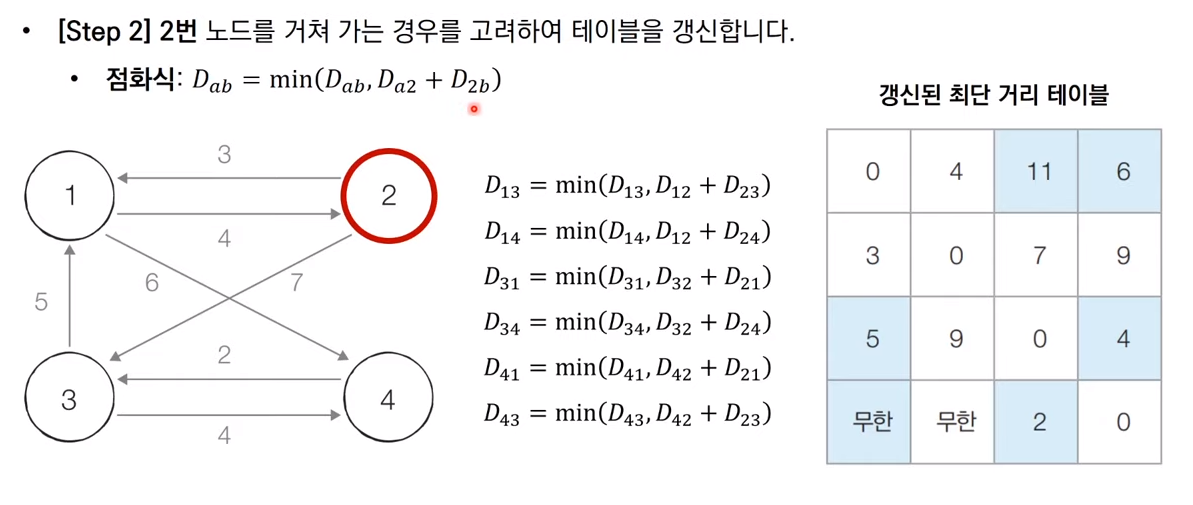

이처럼 3번, 4번 노드를 모두 거쳐가는 경우를 고려하여 테이블을 갱신한다.

In [20]:
INF = int(1e9)

n = 4

graph = [[INF] * n for _ in range(n)]

# a와 b가 같으면 자기 자신
# 자기 자신은 0
for a in range(n):
    for b in range(n):
        if a == b:
            graph[a][b] = 0

# a에서 b로 가는 비용
graph[0][1] = 4
graph[0][3] = 6
graph[1][0] = 3
graph[1][2] = 7
graph[2][0] = 5
graph[2][3] = 4
graph[3][2] = 2

# 플로이드 워셜 알고리즘
for k in range(n):
    for a in range(n):
        for b in range(n):
            # a에서 b로 가능 비용과 a에서 k를 거쳐 b로 가는 비용을 비교해, 
            # 더 작은 쪽을 2차원 표에 작성
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b]) 

result = ''
for i in range(len(graph)):
    for j in graph[i]:
        if j == INF:
            result += 'I '
        else:
            result += str(j) + ' '
    result += '\n'

print(result)

0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 



## 플로이드 워셜 알고리즘 성능 분석

노드의 개수가 N개일 때 알고리즘 상 N번의 단계를 수행한다. 각 단계마다 `O(N^2)`의 연산을 통해 현재 노드를 거쳐 가는 모든 경로를 고려한다.

따라서 플로이드 워셜 알고리즘의 총 시간 복잡도는 `O(N^3)` 이다